Data has been loaded.
Different crime categories:  39


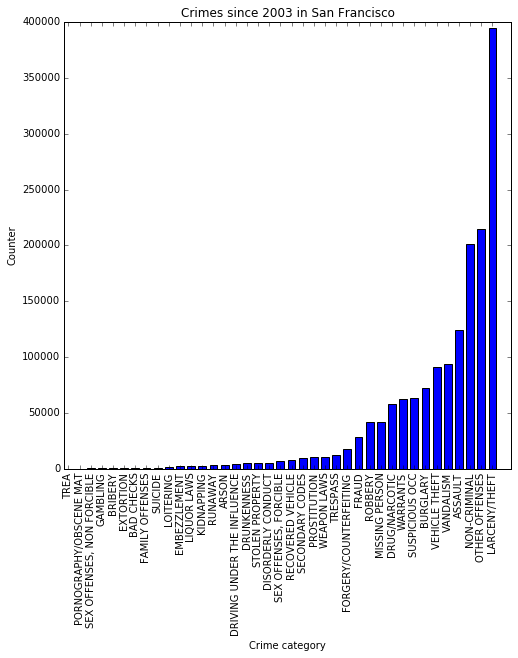

In [2]:
from csv import reader
import numpy as np
import math
from collections import OrderedDict, defaultdict
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline  

i = 0;
data = {}
with open('SFPD_Incidents_-_from_1_January_2003.csv', 'rb') as csvfile:
    for line in reader(csvfile, delimiter=','):
        if(i==0):
            IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId = line
            header = {"IncidntNum": IncidntNum, "Category":Category, "PdDistrict":PdDistrict, "DayOfWeek":DayOfWeek, "Time":Time, "Date":Date, "Address":Address,"X":X,"Y":Y}
        else:
            IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId = line
            data[IncidntNum] = {"Category":Category, "PdDistrict":PdDistrict, "DayOfWeek":DayOfWeek, "Time":Time, "Date":Date, "Address":Address,"X":X,"Y":Y}
        i+=1

print "Data has been loaded." 

crime_counter = {}
for crime in data.values():
    if crime['Category'] in crime_counter:
        crime_counter[crime['Category']] += 1
    else:
        crime_counter[crime['Category']] = 0
        
print "Different crime categories: ", len(crime_counter)

crime_counter = OrderedDict(sorted(crime_counter.items(), key=lambda(k,v):(v,k)))
width = 0.7
labels = crime_counter.keys()
indices = np.arange(len(crime_counter))

# Make a plot
plt.figure(figsize=(8,8))
plt.bar(indices, crime_counter.values(), width)
plt.xticks(indices + width/2, labels, rotation='vertical')
plt.title('Crimes since 2003 in San Francisco')
plt.xlabel('Crime category')
plt.ylabel('Counter')
plt.show()

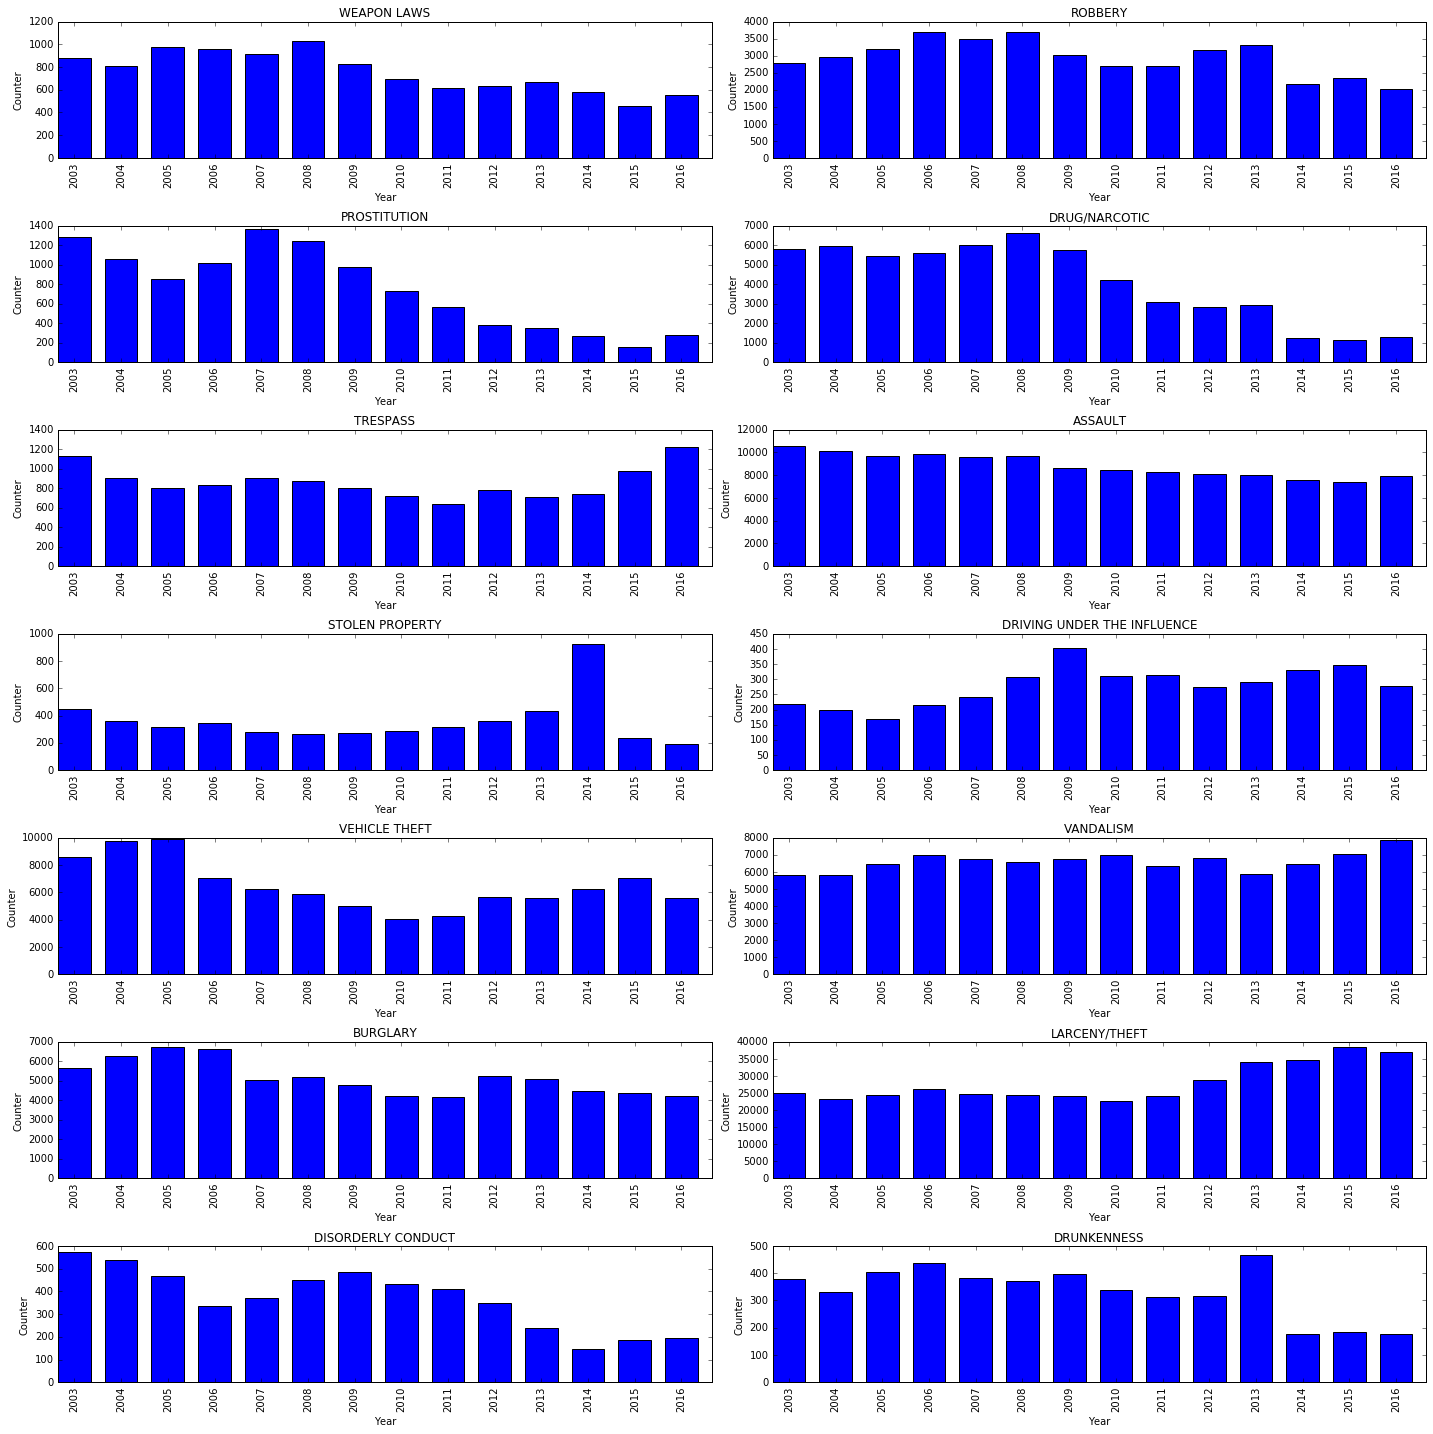

In [3]:

focus_crimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
years = np.arange(2003,2016+1)
yearly_crime_counter = dict((crime, dict((year,0) for year in years)) for crime in focus_crimes)

for crime in data.values():
    category = crime['Category']
    year = int( crime["Date"].split("/")[-1] )
    if category in focus_crimes and year in years:
        yearly_crime_counter[category][year] += 1
        
# Generate the plot
cnt = 1
width = 0.7
indices = np.arange(len(years))
plt.figure(figsize=(20,20))
for category in yearly_crime_counter.keys():     
    yearly_crime_counter[category] = OrderedDict(sorted(yearly_crime_counter[category].items()))
    labels = yearly_crime_counter[category]
    
    plt.subplot(7,2,cnt)    
    plt.bar(indices, yearly_crime_counter[category].values(), width)
    plt.xticks(indices + width/2, labels, rotation='vertical')
    plt.title(category)
    plt.xlabel('Year')
    plt.ylabel('Counter')
    cnt += 1

    plt.tight_layout(h_pad=1.0)
plt.show()



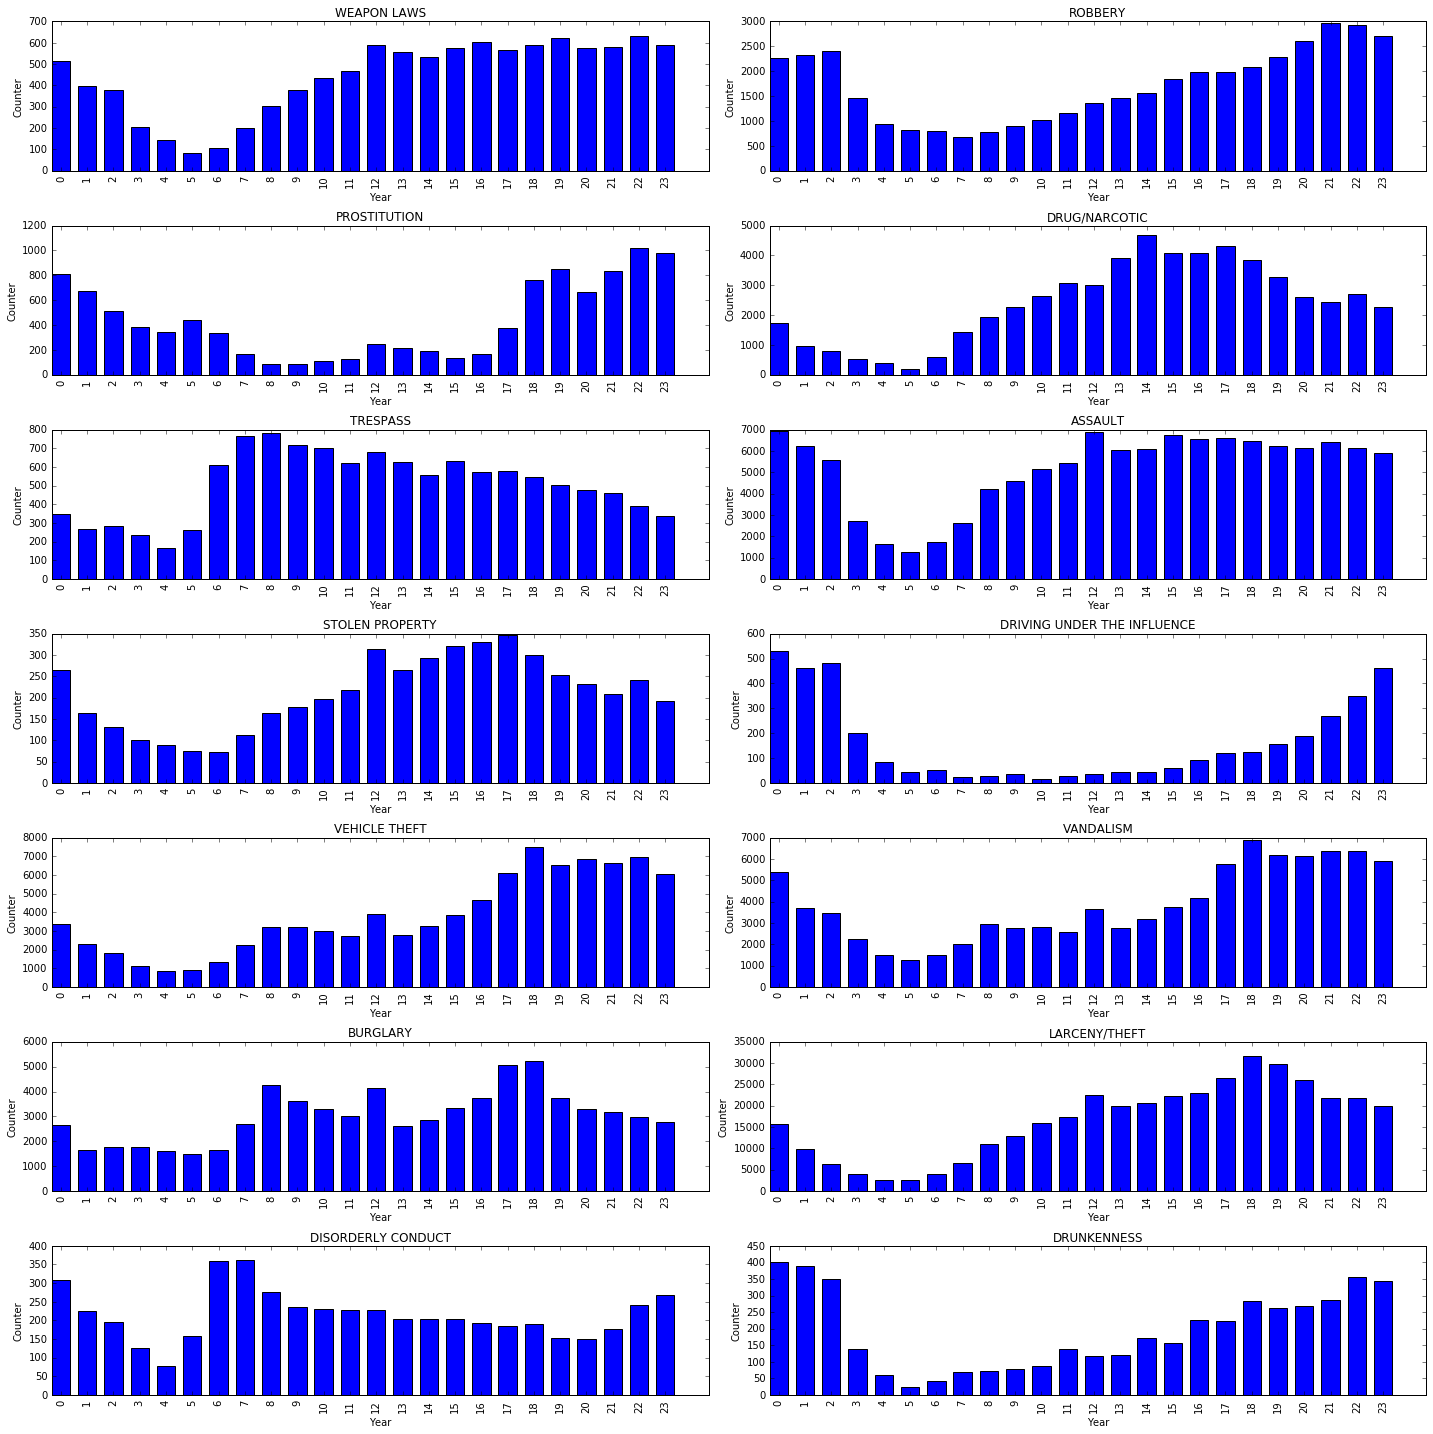

In [4]:
focus_crimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
hours = np.arange(0,24)
hourly_crime_counter = dict((crime, dict((hour,0) for hour in hours)) for crime in focus_crimes)

for crime in data.values():
    category = crime['Category']
    hour = int( crime["Time"].split(":")[0] )
    if category in focus_crimes and hour in hours:
        hourly_crime_counter[category][hour] += 1
        
# Generate the plot
cnt = 1
width = 0.7
indices = np.arange(len(hours))
plt.figure(figsize=(20,20))
for category in hourly_crime_counter.keys():     
    hourly_crime_counter[category] = OrderedDict(sorted(hourly_crime_counter[category].items()))
    labels = hourly_crime_counter[category]
    
    plt.subplot(7,2,cnt)    
    plt.bar(indices, hourly_crime_counter[category].values(), width)
    plt.xticks(indices + width/2, labels, rotation='vertical')
    plt.title(category)
    plt.xlabel('Year')
    plt.ylabel('Counter')
    cnt += 1

    plt.tight_layout(h_pad=1.0)
plt.show()



In [5]:
focus_crimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
all_crimes = set([crime["Category"] for crime in data.values()])
district_crime_counter = dict((district["PdDistrict"], dict((crime, 0) for crime in all_crimes)) for district in data.values())
        
for crime in data.values():
    category = crime['Category']
    district = crime["PdDistrict"]
    district_crime_counter[district][category] += 1

district_crimes_total = {}
for (district, crimes) in district_crime_counter.iteritems():
    district_crimes_total[district] = sum(crimes.values())

district_crime_counter.pop('')
temp = max(district_crimes_total, key=district_crimes_total.get)
print "Districts: ", district_crime_counter.keys()
print "Most criminal district: ", temp, " with ", district_crimes_total[temp], " commited crimes."

Districts:  ['CENTRAL', 'NORTHERN', 'INGLESIDE', 'SOUTHERN', 'MISSION', 'TENDERLOIN', 'RICHMOND', 'TARAVAL', 'BAYVIEW', 'PARK']
Most criminal district:  SOUTHERN  with  294843  commited crimes.


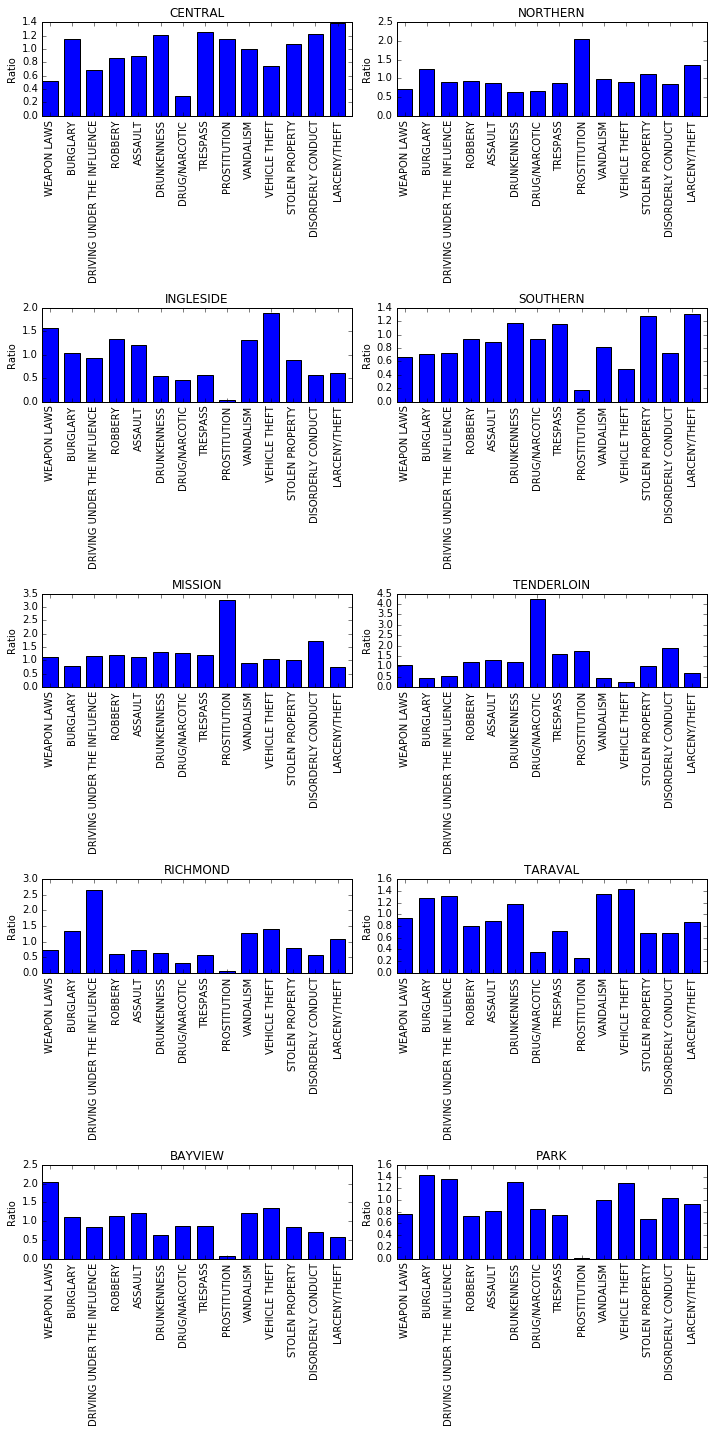

In [6]:
from __future__ import division

total_crimes = sum(crime_counter.values())
prob_crime = {crime: no/total_crimes for (crime, no) in crime_counter.items()}

prob_crimes_dist = {}
for (district, crimes) in district_crime_counter.items():
    total_crimes_district = sum(crimes.values())
    prob_crimes_dist[district] = {crime: no/total_crimes_district for (crime, no) in crimes.items()}
    
ratios = defaultdict(dict)
for district in district_crime_counter.keys():
    for crime in crime_counter.keys():
        ratios[district][crime] = prob_crimes_dist[district][crime] / prob_crime[crime]

# Generate the plot
cnt = 1
width = 0.7
plt.figure(figsize=(10,20))
for (district,crimes) in ratios.items():
    unwanted = set(crimes.keys()) - focus_crimes
    for unwanted_key in unwanted: del crimes[unwanted_key]
    ratios_district = crimes.values()

    labels = crimes
    indices = np.arange(len(ratios_district))
    
    plt.subplot(5,2,cnt)    
    plt.bar(indices, ratios_district, width)
    plt.xticks(indices + width/2, labels, rotation='vertical')
    plt.title(district)
    plt.ylabel('Ratio')
    cnt += 1

    plt.tight_layout(h_pad=1.0)
plt.show()

In [10]:
from geoplotlib.utils import BoundingBox
import geoplotlib

min_lat = 37.85
max_lat = 37.65
min_lon =-122.55
max_lon =-122.35
latitudes = [float(pos["Y"]) for pos in data.values()]
longitudes = [float(pos["X"]) for pos in data.values()]

bbox = BoundingBox(north=max_lat, south=min_lat, west=min_lon, east=max_lon)
geoplotlib.set_bbox(bbox)

geo_data_for_plotting = {"lat": latitudes,
                         "lon": longitudes}

geoplotlib.kde(geo_data_for_plotting, bw=[5,5])
geoplotlib.inline()

('smallest non-zero count', 2.8659146177536182e-09)
('max count:', 326.68184552308435)


In [ ]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABsAAAAPMCAYAAAD8Q3yiAAAiSklEQVR4nO3ZwQkAIBDAsNP9d9Yl%0ABKEkE/TfNTNnAAAAAAAAIGL/DgAAAAAAAICXDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAA%0AAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAA%0AAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABS%0ADDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSDDAAAAAAAABSLjWkCJf/VfxSAAAAAElFTkSuQmCC%0A